In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FT123_18_19.csv',delimiter=';', parse_dates=True)
df['Time'] = pd.to_datetime(df.Time)
df = df[df['Time'].notna()]
df = df.set_index('Time')
df = df.resample("D").last()
df

,Vazão_de_Entrada_(FT01),Vazão_de_Gravidade_(FT02),Vazão_de_Recalque_(FT03)
Time,,,
2018-01-01,164.09,96.57,78.39
2018-01-02,213.96,109.26,97.70
2018-01-03,256.33,138.41,108.98
2018-01-04,232.93,124.64,100.22
2018-01-05,257.22,139.41,108.66
...,...,...,...
2019-12-27,227.66,124.47,105.57
2019-12-28,264.96,118.71,104.87
2019-12-29,209.38,110.74,98.95


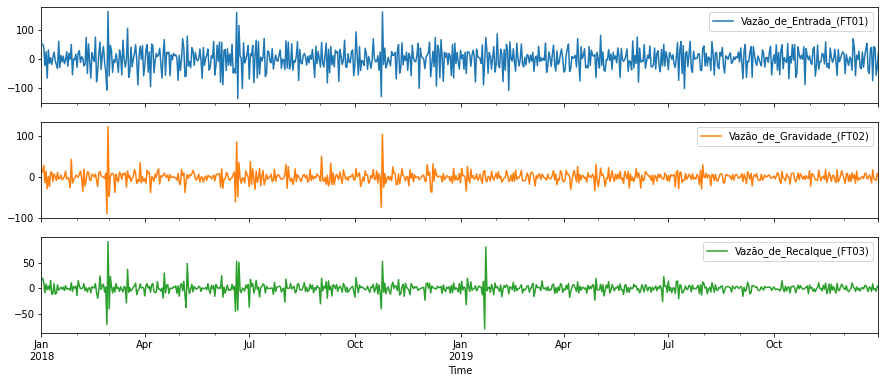

In [3]:
# Diferenciação de grau um para torná-las estacionárias
series_diff = df.diff()
series_diff.plot(subplots=True, figsize=(15,6))
plt.show()


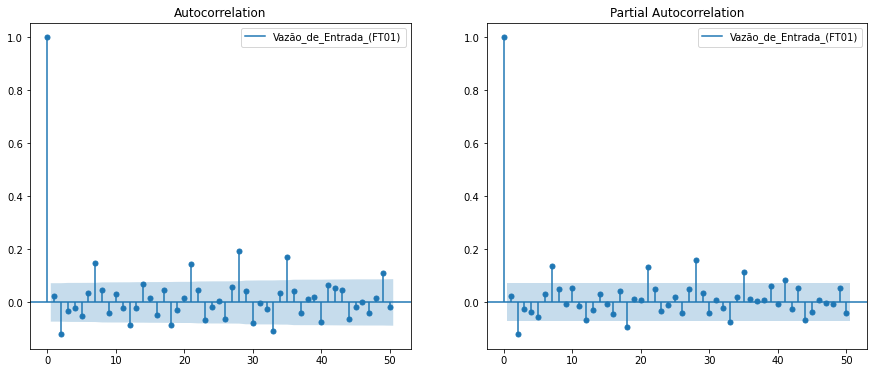

In [4]:
# Análise de auto correlação dos lags anteriores FT01
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot_acf(df['Vazão_de_Entrada_(FT01)'], lags=50, ax=ax[0])
plot_pacf(df['Vazão_de_Entrada_(FT01)'], lags=50, ax=ax[1])
ax[0].legend(["Vazão_de_Entrada_(FT01)"], loc="upper right")
ax[1].legend(["Vazão_de_Entrada_(FT01)"], loc="upper right")
plt.show()

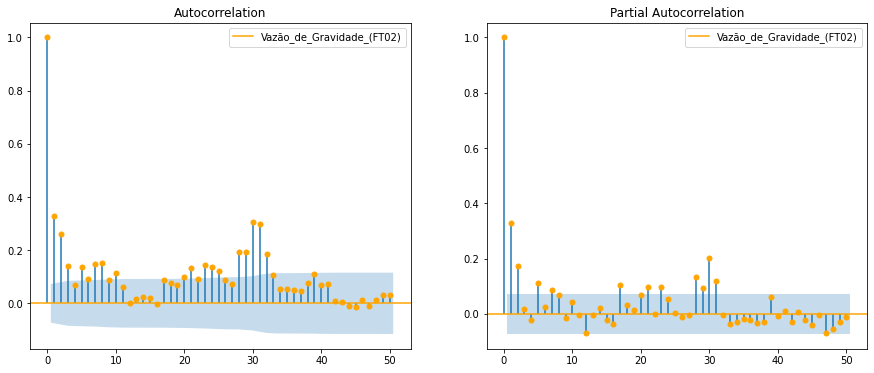

In [5]:
# Análise de auto correlação dos lags anteriores FT02
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot_acf(df['Vazão_de_Gravidade_(FT02)'], lags=50, ax=ax[0], color='orange')
plot_pacf(df['Vazão_de_Gravidade_(FT02)'], lags=50, ax=ax[1], color='orange')
ax[0].legend(["Vazão_de_Gravidade_(FT02)"], loc="upper right")
ax[1].legend(["Vazão_de_Gravidade_(FT02)"], loc="upper right")
plt.show()

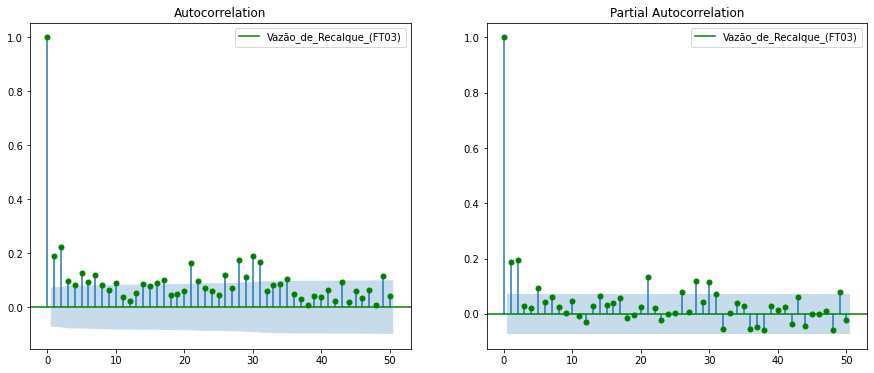

In [6]:
# Análise de auto correlação dos lags anteriores FT03
fig, ax = plt.subplots(1,2,figsize=(15,6))
plot_acf(df['Vazão_de_Recalque_(FT03)'], lags=50, ax=ax[0], color='green')
plot_pacf(df['Vazão_de_Recalque_(FT03)'], lags=50, ax=ax[1], color='green')
ax[0].legend(["Vazão_de_Recalque_(FT03)"], loc="upper right")
ax[1].legend(["Vazão_de_Recalque_(FT03)"], loc="upper right")
plt.show()

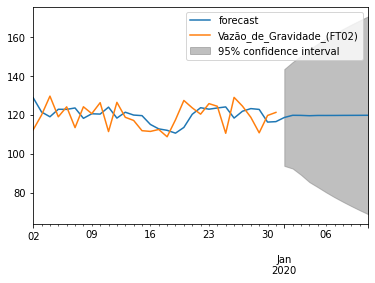

In [8]:
model = ARIMA(df['Vazão_de_Gravidade_(FT02)'], order=(2,1,0),freq='D')
model_fit = model.fit()
model_fit.plot_predict(700,df['Vazão_de_Gravidade_(FT02)'].count()+10,dynamic=False)
plt.show()
fc, se, conf = model_fit.forecast(steps=1, alpha=0.05)
fc_vazao = pd.Series(fc, name='Vazao02')

In [ ]:
# Prevendo n-passos a frente (30 dias)
steps = 10
model_fit.plot_predict(700,df['Vazao02'].count()+steps,dynamic=False)
plt.show()
fc, se, conf = model_fit.forecast(steps=steps)
fc_vazao = pd.Series(fc, name='Vazao02')
fc_vazao